In [2]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import cv2
except Exception as e:
    print(f"Importing Error: {e}")

# Edge Detection

* Edges are more compact than pixels.
* Most semantic and shape information from the image can be encoded in the edges.

**Why do we care about edges?**
* Extract information
* Recognize image
* Recover geometry and viewpoint

![Example](..\images\assets\edge_detection.png)
<div style="text-align: right"> Source: D. Lowe </div>

## Designing an edge detector

* Criteria for a good edge detector:
    - **Good detection** 
        * the optimal detector should find all real edges, ignoring noise or other artifacts.
    - **Good localization**
        * the edges detected must be as close as possible to the true edges
        * the detector must return one point only for each true edge point

* Cues of edge detection
    - Differences in color, intensity or texture across the boundary
    - Continiuty and closure
    - High-level knowledge

<div style="text-align: right"> Source: L. Fei-Fei </div>                                                                                                               

## Canny Edge Detector

* This is probably the most widely used edge detector in computer vision
* Theoretical model: step-edges corrupted by additive gaussian noise
* Canny has shown that the first derivative of the gaussian closely approximates the operator that optimizes the product of signal-to-noise ratio and localization

<div style="text-align: right"> Source: L. Fei-Fei </div>     

In [3]:
"""
Upload the image
"""
image = cv2.imread("../images/lenna.png", cv2.IMREAD_GRAYSCALE)

In [4]:
"""
Apply the Canny
"""
th1 = 35.0
th2 = 150.0
filtered_image = cv2.Canny(image=image, threshold1=th1, threshold2=th2, apertureSize=3, L2gradient=False)

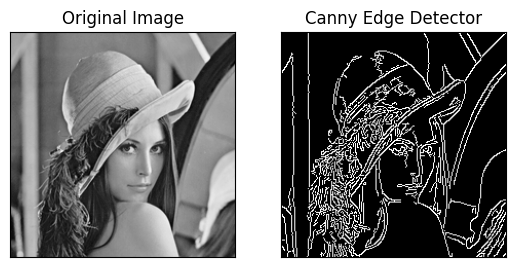

In [5]:
"""
Draw Original Image
"""
plt.subplot(121) 
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

"""
Draw Filtered Image
"""
plt.subplot(122) 
plt.imshow(filtered_image, cmap="gray")
plt.title("Canny Edge Detector")
plt.xticks([])
plt.yticks([])


plt.show()

### Derivative of Gaussian Filter
![derivative](..\images\assets\derivative_of_gaussian.png)


### Compute Gradients (DoG)

In [6]:
"""
X and Y directions Gaussian Filter
"""
dx = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
dy = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

In [7]:
"""
Gradient Magnitude Formula = sqrt(dx**2 + dy**2)
"""
gradient_magnitude = np.sqrt(dx**2 + dy**2)

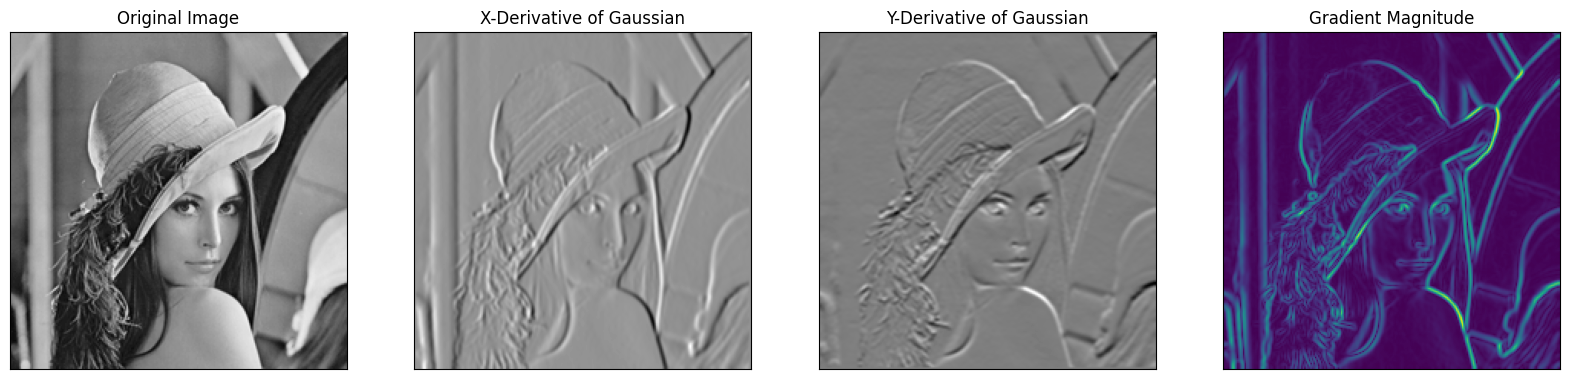

In [8]:
"""
Draw all images
"""

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

plt.subplot(142)
plt.imshow(dx, cmap="gray")
plt.title("X-Derivative of Gaussian")
plt.xticks([])
plt.yticks([])

plt.subplot(143)
plt.imshow(dy, cmap="gray")
plt.title("Y-Derivative of Gaussian")
plt.xticks([])
plt.yticks([])

plt.subplot(144)
plt.imshow(gradient_magnitude, cmap="viridis")
plt.title("Gradient Magnitude")
plt.xticks([])
plt.yticks([])

plt.show()

### Get Orientation at Each Pixel

* Threshold at minimum level
* Get orientation
    - theta = arctan(dy, dx)

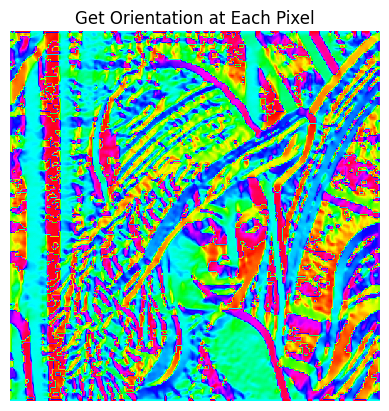

In [9]:
get_orientation_image = np.arctan2(dy, dx)

plt.imshow(get_orientation_image, cmap="hsv")
plt.title("Get Orientation at Each Pixel")
plt.axis("off")

plt.show()